In [176]:
# coding: utf-8

# Jeremy Aguillon
# Project 2
# CMSC 471
# 20 March 2016
# This is my code to implement hill climbing, 
# hill climbing with random restarts and 
# simulated annealing local search algorithms

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from decimal import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import time

#Search input variables
X_MIN = -2.5
X_MAX = 2.5
Y_MIN = -2.5
Y_MAX = 2.5
STEP = .05
SA_STEP = .25
RESTARTS = 100
MAX_TEMP = 1000
HC = 0
SA = 1
HCWR = 2

# Main function
def main():
    '''
    #old test cases
    print("Test function: sinc(x) + sinc(y)")
    localMin, xVal, yVal = hill_climb(sincFn, STEP, X_MIN, X_MAX, Y_MIN, Y_MAX)
    print("Basic Hillclimbing \nlocalMIN:",localMin, "x:",xVal,"y:",yVal)
    localMin, xVal, yVal = hill_climb_random_restart(sincFn, STEP, RESTARTS, X_MIN, X_MAX, Y_MIN, Y_MAX)
    print("Hillclimbing with restarts\nlocalMIN:",localMin, "x:",xVal,"y:",yVal)
    simulated_annealing(sincFn, STEP, MAX_TEMP, X_MIN, X_MAX, Y_MIN, Y_MAX)
    print("Simulated Annealing\nlocalMIN:",localMin, "x:",xVal,"y:",yVal)
  

    print("Test function: tan(x) * tan(y)")
    localMin, xVal, yVal = hill_climb(tantan, STEP, X_MIN, X_MAX, Y_MIN, Y_MAX)
    print("Basic Hillclimbing \nlocalMIN:",localMin, "x:",xVal,"y:",yVal)
    localMin, xVal, yVal = hill_climb_random_restart(tantan, STEP, RESTARTS, X_MIN, X_MAX, Y_MIN, Y_MAX)
    print("Hillclimbing with restarts\nlocalMIN:",localMin, "x:",xVal,"y:",yVal)
    localMin, xVal, yVal = simulated_annealing(tantan, STEP, MAX_TEMP, X_MIN, X_MAX, Y_MIN, Y_MAX)
    print("Simulated Annealing\nlocalMIN:",localMin, "x:",xVal,"y:",yVal)
    

    print("Test function: x * y")
    localMin, xVal, yVal = hill_climb(xTimesY, STEP, X_MIN, X_MAX, Y_MIN, Y_MAX)
    print("Basic Hillclimbing \nlocalMIN:",localMin, "x:",xVal,"y:",yVal)
    localMin, xVal, yVal = hill_climb_random_restart(xTimesY, STEP, RESTARTS, X_MIN, X_MAX, Y_MIN, Y_MAX)
    print("Hillclimbing with restarts\nlocalMIN:",localMin, "x:",xVal,"y:",yVal)
    localMin, xVal, yVal = simulated_annealing(xTimesY, STEP, MAX_TEMP, X_MIN, X_MAX, Y_MIN, Y_MAX)
    print("Simulated Annealing\nlocalMIN:",localMin, "x:",xVal,"y:",yVal)
    
    '''
    
    # Testing the given function for part 2
    print("Test function: real one")
    startTime = time.time()
    localMin, xVal, yVal, path = hill_climb(realFn, 1, X_MIN, X_MAX, Y_MIN, Y_MAX)
    endTime = time.time()
    newplot(realFn, path, 'hillclimbingSearch.jpg', HC, 'Hillclimbing')
    
    print("Basic Hillclimbing \nlocalMIN:",localMin, "x:",xVal,"y:",yVal, "time taken:", endTime - startTime)
    
    startTime = time.time()
    localMin, xVal, yVal, paths = hill_climb_random_restart(realFn, STEP, RESTARTS, X_MIN, X_MAX, Y_MIN, Y_MAX)
    endTime = time.time()
    newplot(realFn, paths, "HCWRRSearch.jpg", HCWR)
    
    print("Hillclimbing with restarts\nlocalMIN:",localMin, "x:",xVal,"y:",yVal, "time taken:", endTime - startTime)

    startTime = time.time()
    localMin, xVal, yVal, path = simulated_annealing(realFn, STEP, MAX_TEMP, X_MIN, X_MAX, Y_MIN, Y_MAX)
    endTime = time.time()
    newplot(realFn, path, 'simAnnealSearch.jpg', SA, 'Simulated Annealing')
    print("Simulated Annealing\nlocalMIN:",localMin, "x:",xVal,"y:",yVal, "time taken:", endTime - startTime)

    print("Computing averages")
    
    # decimal precision 
    getcontext().prec = 4

    hillClimb = {}
    totTime = 0
    totMin = 0
    for i in range(RESTARTS):
        startTime = time.time()
        localMin, xVal, yVal, path = hill_climb(realFn, STEP, X_MIN, X_MAX, Y_MIN, Y_MAX)
        endTime = time.time()
        totMin += localMin
        
        # gets unique keys to four decimal places
        if Decimal(localMin).quantize(Decimal('.0001'), rounding=ROUND_UP) not in [Decimal(x).quantize(Decimal('.0001'), rounding=ROUND_UP) for x in hillClimb.keys()]:
            hillClimb[localMin] = [(xVal, yVal)]
        totTime += endTime - startTime

    print("Hillclimbing averages\nMins found:",len(hillClimb.keys()),"\naverage min:",totMin/RESTARTS,"\naverage time:",totTime/25)

    hc_restarts = {}
    totTime = 0
    totMin = 0
    for i in range(RESTARTS):
        startTime = time.time()
        localMin, xVal, yVal, paths = hill_climb_random_restart(realFn, STEP, RESTARTS, X_MIN, X_MAX, Y_MIN, Y_MAX)
        endTime = time.time()
        totMin += localMin
        
        # gets unique keys to four decimal places
        if Decimal(localMin).quantize(Decimal('.0001'), rounding=ROUND_UP) not in [Decimal(x).quantize(Decimal('.0001'), rounding=ROUND_UP) for x in hc_restarts.keys()]:
            hc_restarts[localMin] = [(xVal, yVal)]
        totTime += endTime - startTime

    print("Hillclimbing with restarts averages\nMins found:",len(hc_restarts.keys()),"\naverage min:",totMin/RESTARTS,"\naverage time:",totTime/25)

    simAnneal = {}
    totTime = 0
    totMin = 0
    for i in range(RESTARTS):
        startTime = time.time()
        localMin, xVal, yVal, path = simulated_annealing(realFn, SA_STEP, MAX_TEMP, X_MIN, X_MAX, Y_MIN, Y_MAX)
        endTime = time.time()
        totMin += localMin
        
        # gets unique keys to four decimal places
        if Decimal(localMin).quantize(Decimal('.0001'), rounding=ROUND_UP) not in [Decimal(x).quantize(Decimal('.0001'), rounding=ROUND_UP) for x in simAnneal.keys()]:
            simAnneal[localMin] = [(xVal, yVal)]
        totTime += endTime - startTime

    print("Simulated Annealing averages\nMins found:",len(simAnneal.keys()),"\naverage min:",totMin/RESTARTS,"\naverage time:",totTime/25)

In [177]:
# hill_climb() performs a single hill climbing search on a given function with given parameters
# Input: function_to_optimize - a pointer to a function that this code searches
#        step_size - the amount moved each time a move is made
#        xmin/ymin - the minimum values that x or y can contain
#        xmax/ymax - the maximum values that x or y can contain
# Output: curMin - the local minimum found with the hill climbing search
#         curX - the x value of the function at the local minimum
#         curY - the y value of the function at the local minimum
def hill_climb(function_to_optimize, step_size, xmin, xmax, ymin, ymax):
    # stores the path this search takes
    path = []
    # selects random starting point
    curX = np.random.uniform( xmin, xmax )
    curY = np.random.uniform( ymin, ymax )
    curMin = function_to_optimize(curX, curY)
    path.append((curX, curY, curMin))
    #path.append(curMin)
    # while loop flag
    searching = True

    # searches the function until a local minimum is found
    while(searching):
        #print("curMIN:",curMin, "x:",curX,"y:",curY)
        
        # stores each possible step in an array to check if they are in bounds and less than curMin
        tempMin = [function_to_optimize(curX+step_size, curY), function_to_optimize(curX-step_size, curY), 
                   function_to_optimize(curX, curY+step_size), function_to_optimize(curX, curY-step_size)]
        
        # finds a lower minimum and updates it or ends the loop
        if( curX+step_size <= xmax and tempMin[0] < curMin ):
            curX = curX + step_size
            curMin = function_to_optimize(curX, curY)
        elif( curX-step_size >= xmin and tempMin[1] < curMin ):
            curX = curX - step_size
            curMin = function_to_optimize(curX, curY)
        elif( curY+step_size <= ymax and tempMin[2] < curMin ):
            curY = curY + step_size
            curMin = function_to_optimize(curX, curY)
        elif( curY-step_size >= ymin and tempMin[3] < curMin ):
            curY = curY - step_size
            curMin = function_to_optimize(curX, curY)
        else:
            #print("Local min or plateau or something\ncurMin",curMin,"\ntempmins", tempMin)
            searching = False
        path.append((curX, curY, curMin))
        #path.append(curMin)
    #print("end loop - min:",curMin)
    #print("localMin:",curMin, "x:",curX,"y:",curY)
    return curMin, curX, curY, path


In [178]:
# hill_climb_random_restart() performs multiple hill climbing searches on a given function with given parameters
# Input: function_to_optimize - a pointer to a function that this code searches
#        step_size - the amount moved each time a move is made
#        num_restarts - the number of times hill climbing will be applied to the function
#        xmin/ymin - the minimum values that x or y can contain
#        xmax/ymax - the maximum values that x or y can contain
# Output: curMin - the local minimum found with the hill climbing search
#         curX - the x value of the function at the local minimum
#         curY - the y value of the function at the local minimum
def hill_climb_random_restart(function_to_optimize, step_size, num_restarts, xmin, xmax, ymin, ymax):
    paths = []
    # Initial values
    curMin, curX, curY, curPath = hill_climb(function_to_optimize, step_size, xmin, xmax, ymin, ymax)
    paths.append(curPath)
#    ax = newplot(realFn, path, 'Hillclimbing with Restarts', 'hcWRestarts.jpg')

    # performs hill climbing the number of times given
    for i in range(num_restarts - 1):
        tempMin, xVal, yVal, path = hill_climb(function_to_optimize, step_size, xmin, xmax, ymin, ymax)
        #print("tempMin:",tempMin, "curMin: ",curMin,"x:",xVal,"y:",yVal)
        paths.append(path)
        
        # updates if min is lower
        if tempMin < curMin:
            #print("updating curmin")
            curMin = tempMin
            curX = xVal
            curY = yVal
            curPath = path
    paths.append(curPath)
    return curMin, curX, curY, paths

In [179]:
# simulated_annealing() does the simulated annealing algorithm on the function
#                       which starts out making random moves good or bad and 
#                       makes only good moves as the temperature lowers
# Input: function_to_optimize - a pointer to a function that this code searches
#        step_size - the amount moved each time a move is made
#        max_temp - the starting temperature of the function
#        xmin/ymin - the minimum values that x or y can contain
#        xmax/ymax - the maximum values that x or y can contain
# Output: curMin - the local minimum found with the hill climbing search
#         curX - the x value of the function at the local minimum
#         curY - the y value of the function at the local minimum
def simulated_annealing(function_to_optimize, step_size, max_temp, xmin, xmax, ymin, ymax):
    # path algorithm takes
    path = []
    # amount the temperature will cool each iteration
    COOLING = .95
    
    # probablity() performs the e^(new-old)/t calculation
    def probability(prev, cur, temp):
        return np.exp( (prev - cur)/temp )
    
    # gets random starting point
    curX = np.random.uniform( xmin, xmax )
    curY = np.random.uniform( ymin, ymax )
    xVal = curX
    yVal = curY
    curMin = function_to_optimize(curX, curY)
    path.append((curX, curY, curMin))
    
    
    #print("Starting SA\nlocalMin:",curMin, "x:",curX,"y:",curY)

    # loops until the temperature has fully cooled
    while( max_temp >= .0001 ):
        # gets all possible moves and stores them
        tempMin = [function_to_optimize(curX+step_size, curY), function_to_optimize(curX-step_size, curY), function_to_optimize(curX, curY+step_size), function_to_optimize(curX, curY-step_size)]
        legalChange = [curX+step_size <= xmax, curX-step_size >= xmin, curY+step_size <= ymax, curY-step_size >= ymin]
        tempChange = [curX+step_size, curX-step_size, curY+step_size, curY-step_size]
        # picks a random direction - 0 = x + step | 1 = x - step | 2 = y + step | 3 = y - step
        direction = np.random.randint(4)
        
        # updates if the new move is lower than the local min
        if( legalChange[direction] and tempMin[direction] < curMin ):
            if direction in [0,1]:
                curX = tempChange[direction]
            elif direction in [2,3]:
                curY = tempChange[direction]
            #print("updating min - tempMin:",tempMin[direction],"curMin", curMin,"temp",max_temp)

            curMin = function_to_optimize(curX, curY)
            path.append((curX, curY, curMin))
            
            # stores coordinates of local min to return
            xVal = curX
            yVal = curY
         
        # not a new local min
        else:
            # compares the probability to a random number between 0 and 1 to see if it will make a bad move
            prob = probability(curMin, tempMin[direction], max_temp)
            randNum = np.random.random()
            if prob > randNum:
                if direction in [0,1]:
                    curX = tempChange[direction]
                elif direction in [2,3]:
                    curY = tempChange[direction]       
                #print("making bad move - tempMin:",tempMin[direction],"curMin", curMin,"probability", prob, "random", randNum,"temp",max_temp)
                path.append((curX, curY, curMin))
        # cools the temperature
        max_temp *= COOLING
    
    return curMin, xVal, yVal, path
        

In [180]:
## TEST FUNCTIONS ##
# sunc functions with multiple local minimums
def sincFn(x,y):
    return np.sinc(x) + np.sinc(y)

# tan of both x and y with empty areas in the search space
def tantan(x,y):
    return np.tan(x) * np.tan(y)

# a flat surface to search
def xTimesY(x,y):
    return x * y

# given function in part 2 to search
def realFn(x,y):
    r = np.sqrt(x**2 + y**2)
    return ( np.sin(x**2 + 3*(y**2))/(.1 + r**2) ) + (x**2 + 5*(y**2)) * ( np.exp(1-r**2)/2 )

In [181]:
def newplot(fn, path, saveFile, sType, search = ''):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X = np.arange(X_MIN, X_MAX, STEP)
    Y = np.arange(Y_MIN, Y_MAX, STEP)
    X, Y = np.meshgrid(X, Y)
    Z = fn(X,Y)

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.terrain, linewidth=0, antialiased=False)
    
    if sType == SA or sType == HC:
        path = np.array(path)
        ax.plot(path[:,0],path[:,1],path[:,2], label=search, color='red')
        ax.legend()
    else:
        p = np.array(path[1])
        ax.plot(p[:,0],p[:,1],p[:,2], label='Regular Hillclimbing', color='red')
        ax.legend()
    
        for p in path[1:-1]:
            p = np.array(p)
            ax.plot(p[:,0],p[:,1],p[:,2], color='red')
            ax.legend()
    
        p = np.array(path[-1])
        ax.plot(p[:,0],p[:,1],p[:,2], label='Local Min', color='green', linewidth=2)
        ax.legend()
    
    # rotates to see mins better
    ax.view_init(30, 360)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.savefig(saveFile, bbox_inches='tight')
    plt.show()
    

Test function: real one


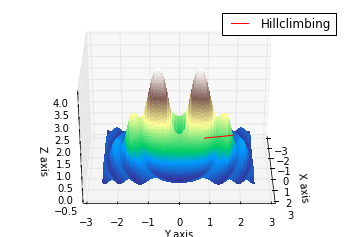

Basic Hillclimbing 
localMIN: 0.0191168719991 x: -1.6142556788254014 y: 0.880121262011917 time taken: 0.00013494491577148438


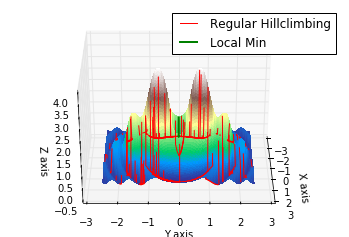

Hillclimbing with restarts
localMIN: -0.15025967275 x: -2.17233884082992 y: -0.014380879479673592 time taken: 0.1367201805114746


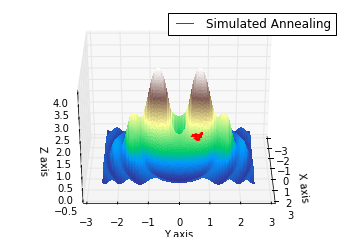

Simulated Annealing
localMIN: -0.127678399253 x: -2.1347950632926254 y: 0.4194471965925811 time taken: 0.017342090606689453
Computing averages
Hillclimbing averages
Mins found: 88 
average min: -0.116546172004 
average time: 0.004872303009033203
Hillclimbing with restarts averages
Mins found: 2 
average min: -0.150259158849 
average time: 0.39496626853942873
Simulated Annealing averages
Mins found: 94 
average min: -0.117060168829 
average time: 0.05540627479553223


In [182]:
# call to main
main()

In [183]:
getcontext().prec = 5
print(getcontext())
print(Decimal('7.325').quantize(Decimal('.0001'), rounding=ROUND_UP))

Context(prec=5, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[Inexact, InvalidOperation, FloatOperation, Rounded], traps=[InvalidOperation, DivisionByZero, Overflow])
7.3250
